# Load Digits Data

In [93]:
from sklearn.datasets import load_digits

digits = load_digits()

In [94]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [95]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [96]:
digits['data'].shape

(1797, 64)

In [97]:
digits['target'].shape

(1797,)

## Displaying Digits

In [126]:
def display_img(img, target, ax):
    img = img.reshape((8, 8))
    
    ax.imshow(img, cmap='gray', vmin=0, vmax=16)
    ax.set_title(f'Digit: {str(target)}')
    ax.grid(False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


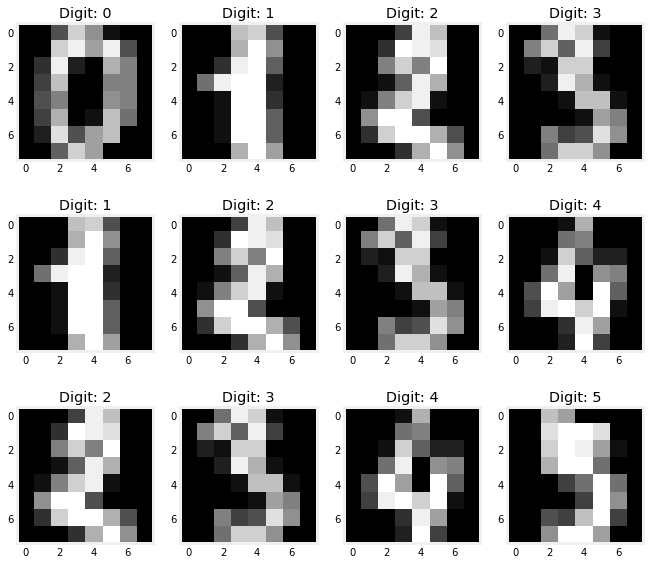

In [127]:
fig, axs = plt.subplots(3, 4, figsize=(10, 10))

for i in range(3):
    for j in range(4):
        display_img(digits['data'][i+j], digits['target'][i+j], axs[i][j])

fig.show()

## Digits Train/Test Split

In [243]:
from sklearn.model_selection import train_test_split

x, y = digits['data'], digits['target']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [244]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
clf = LogisticRegression()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)


from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 98.2% [train score: 99.9%]


## Digits KNN

In [167]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

t = time.time()
clf.fit(x_train, y_train)
print(f'Time taken to fit {time.time() - t:.2f}s')

t = time.time()
y_train_pred = clf.predict(x_train)
print(f'Time taken to predict {time.time() - t:.2f}s')


t = time.time()
y_test_pred = clf.predict(x_test)
print(f'Time taken to predict {time.time() - t:.2f}s')



Time taken to fit 0.00s
Time taken to predict 0.34s
Time taken to predict 0.06s
Digits test accuracy score: 98.4% [train score: 99.3%]


In [169]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 98.2% [train score: 99.1%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


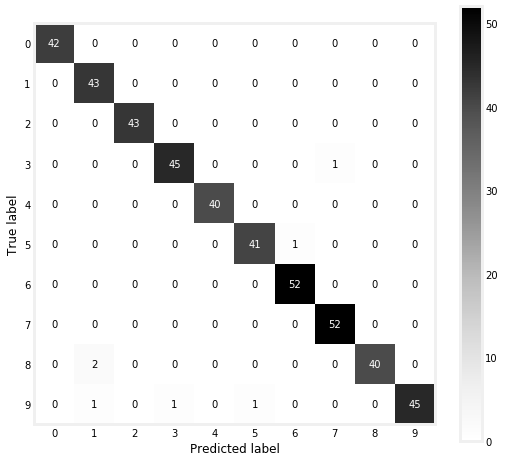

In [132]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test, y_test, cmap='Greys', ax=ax)
ax.grid(False)

fig.show()

## Digits PCA

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_train_2d = pca.fit_transform(x_train)
x_test_2d = pca.transform(x_test)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


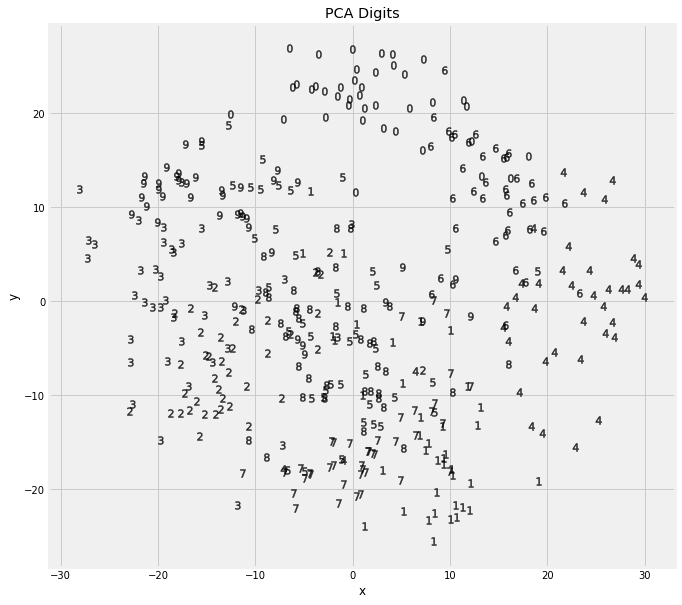

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_2d[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('PCA Digits')

fig.show()

In [135]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_2d, y_train)

y_train_pred = clf.predict(x_train_2d)
y_test_pred = clf.predict(x_test_2d)

In [136]:
from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 64.2% [train score: 73.6%]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


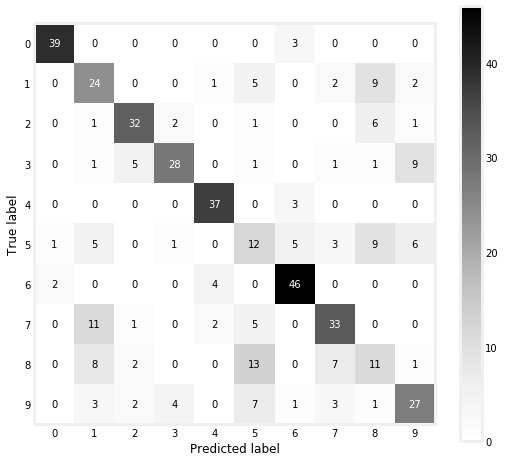

In [137]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

plot_confusion_matrix(clf, x_test_2d, y_test, cmap='Greys', ax=ax)
ax.grid(False)

fig.show()

## Distances 

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


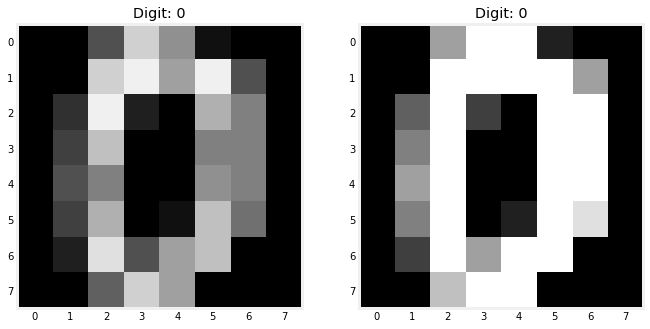

In [154]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))

display_img(1.0 * digits['data'][0], digits['target'][0], axs[0])
display_img(2.0 * digits['data'][0], digits['target'][0], axs[1])

fig.show()

In [155]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

d0 = manhattan_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]


d1 = euclidean_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

d2 = cosine_distances(
    [1.0 * digits['data'][0], 2.0 * digits['data'][0]]
)[0,1]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


In [163]:
from sklearn.metrics.pairwise import paired_distances

d0 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='manhattan')[0]
d1 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='euclidean')[0]
d2 = paired_distances([1.0 * digits['data'][0]], [2.0 * digits['data'][0]], metric='cosine')[0]

print(
    f'Manhattan Distances = {d0:.2f}, Euclidean Distances = {d1:.2f}, Cosine Distances {d2:.2f}'
)

Manhattan Distances = 294.00, Euclidean Distances = 55.41, Cosine Distances 0.00


# Fashion MNIST

In [2]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml(data_id=40996)

In [3]:
fashion_mnist['data'].shape

(70000, 784)

In [18]:
fashion_mnist['DESCR']

"**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  Pullover  \

In [57]:
help(''.rsplit)

Help on built-in function rsplit:

rsplit(...) method of builtins.str instance
    S.rsplit(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string, starting at the end of the string and
    working to the front.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified, any whitespace string
    is a separator.



In [76]:
c = '0  T-shirt/top  \n1  Trouser  \n2  Pullover  \n3  Dress  \n4  Coat  \n5  Sandal  \n6  Shirt  \n7  Sneaker  \n8  Bag  \n9  Ankle boot'

fashion_label_translation = {
    int(k): v for k, v in [
        item.split(maxsplit=1) for item in c.split('\n')
    ]
}

fashion_label_translation


{0: 'T-shirt/top  ',
 1: 'Trouser  ',
 2: 'Pullover  ',
 3: 'Dress  ',
 4: 'Coat  ',
 5: 'Sandal  ',
 6: 'Shirt  ',
 7: 'Sneaker  ',
 8: 'Bag  ',
 9: 'Ankle boot'}

In [69]:
np.sqrt(fashion_mnist['data'].shape[1])

28.0

In [6]:
from matplotlib.colors import ListedColormap

def display_fashion(img, target, ax):
    
    if len(img.shape):
        img = img.reshape((28, 28))
    
    ax.imshow(img, cmap='Greys')
    ax.set_title(f'{target}')
    ax.grid(False)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


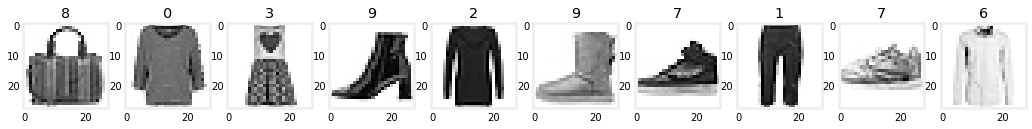

In [7]:
fig, axs = plt.subplots(1, 10, figsize=(16, 10))

import random 

for i in range(10):
    rand = random.choice(range(fashion_mnist['data'].shape[0]))
    display_fashion(fashion_mnist['data'][rand], fashion_mnist['target'][rand], axs[i])

fig.show()

In [249]:
from sklearn.model_selection import train_test_split

x, y = fashion_mnist['data'], fashion_mnist['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [253]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler()
clf = LogisticRegression(max_iter=10000)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

clf.fit(x_train_scaled, y_train)

y_train_pred = clf.predict(x_train_scaled)
y_test_pred = clf.predict(x_test_scaled)


from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

print(
    'Digits test accuracy score: {:.1%} [train score: {:.1%}]'.format(
        accuracy_score(y_test, y_test_pred),
        accuracy_score(y_train, y_train_pred)
    )
    
)

Digits test accuracy score: 84.8% [train score: 88.8%]


In [251]:
import time

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='cosine', weights='uniform', n_jobs=-1)

t = time.time()
clf.fit(x_train, y_train)
print(f'Time taken to fit {time.time() - t:.3f}s')

t = time.time()
y_test_pred = clf.predict(x_test)
print(f'Time taken to predict {time.time() - t:.3f}s')

Time taken to fit 0.153s
Time taken to predict 58.177s


In [252]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%}'.format(
        accuracy_score(y_test, y_test_pred)
    )
    
)

Fashion MNIST test accuracy score: 85.8%


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


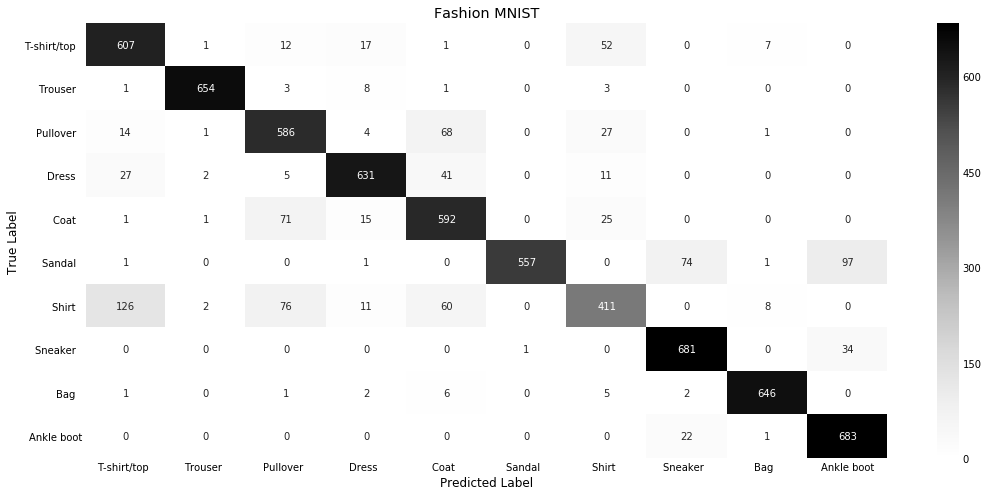

In [177]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

labels_text = list(fashion_label_translation.values())

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(
    cm, cmap='Greys', 
    annot=True, fmt="d",
    yticklabels=labels_text,
    xticklabels=labels_text,
    ax=ax
) 

ax.set_title('Fashion MNIST')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

fig.show()

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)

x_train_nca = nca.fit_transform(x_train, y_train)
x_test_nca = nca.transform(x_test)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for target in set(y_train):
    pd.DataFrame(
        x_train_nca[
            y_train == target
        ],
        columns=['x', 'y']
    ).sample(n=40).plot(
        kind='scatter',
        x='x',
        y='y',
        marker=f'${target}$',
        s=64,
        color='k',
        alpha='0.75',
        ax=ax,
    )
    
ax.set_title('NeighborhoodComponentsAnalysis Fashion')

fig.show()

In [189]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [236]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train_pca, y_train)

y_test_pred = clf.predict(x_test_pca)

In [237]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [PCA]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

Fashion MNIST test accuracy score: 84.5% [PCA]


In [240]:
x_train_ipca = pca.inverse_transform(x_train_pca)
x_test_ipca = pca.inverse_transform(x_test_pca)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


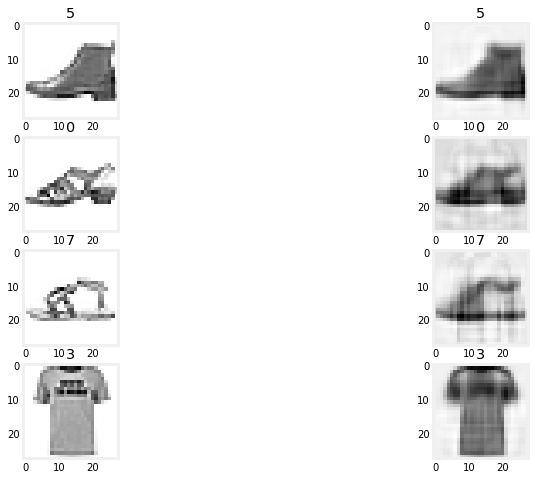

In [239]:
fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img_orig = x_train[rand]
    img_comp = x_train_ipca[rand]
    
    display_fashion(img_orig, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_comp, fashion_mnist['target'][rand], axs[i][1])


fig.show()

In [241]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

clf.fit(x_train_ipca, y_train)

y_test_pred = clf.predict(x_test_ipca)

In [242]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [PCA]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

Fashion MNIST test accuracy score: 86.3% [PCA]


In [205]:
threshold_mean(img.reshape((28, 28)))

118.5829081632653

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


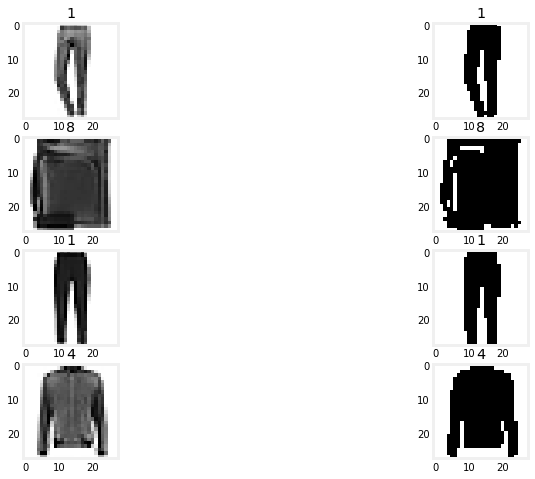

In [214]:
from skimage.filters import threshold_mean

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_bin = img >= img.mean()

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_bin, fashion_mnist['target'][rand], axs[i][1])


fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


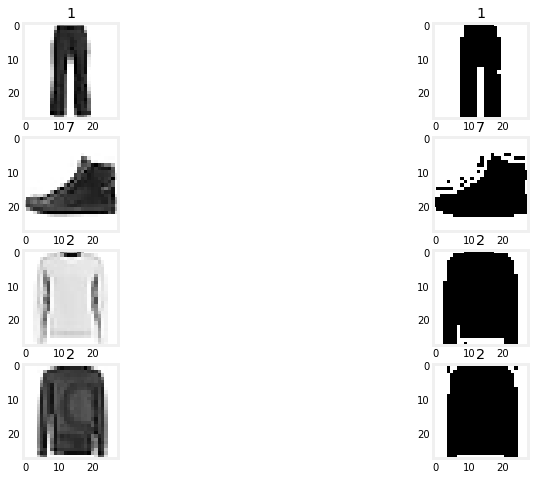

In [229]:
from skimage.filters import threshold_mean

fig, axs = plt.subplots(4, 2, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_bin = img > 0

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_bin, fashion_mnist['target'][rand], axs[i][1])


fig.show()

In [230]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)

x_train_bin = x_train > 0
x_test_bin = x_test > 0

clf.fit(x_train_bin, y_train)

y_test_pred = clf.predict(x_test_bin)

In [231]:
from sklearn.metrics import accuracy_score

print(
    'Fashion MNIST test accuracy score: {:.1%} [Bin]'.format(
        accuracy_score(y_test, y_test_pred),
    )
    
)

Fashion MNIST test accuracy score: 84.9% [Bin]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


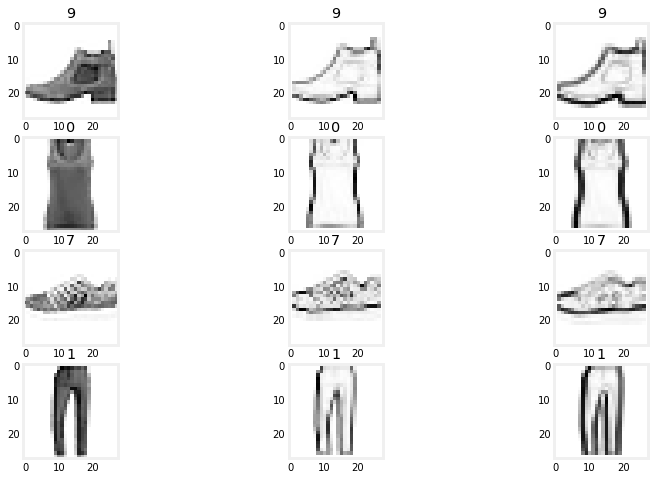

In [227]:
from skimage.filters import roberts, sobel

fig, axs = plt.subplots(4, 3, figsize=(12, 8))

for i in range(4):
    
    rand = random.choice(range(fashion_mnist['data'].shape[0]))

    img = fashion_mnist['data'][rand]
    img_roberts = roberts(img.reshape((28, 28)))
    img_sobel = sobel(img.reshape((28, 28)))

    display_fashion(img, fashion_mnist['target'][rand], axs[i][0])
    display_fashion(img_roberts, fashion_mnist['target'][rand], axs[i][1])
    display_fashion(img_sobel, fashion_mnist['target'][rand], axs[i][2])


fig.show()